[View in Colaboratory](https://colab.research.google.com/github/zia207/Deep-Neural-Network-with-keras-Python-Satellite-Image-Classification/blob/master/DNN_Keras_python_Colab.ipynb)

# Deep Neural Network: Satellite Image Classification in Google Colaboratory iPython Note Book: 


[Colaboratory is a Google research project created to help disseminate machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud](https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html). You do not need to install python or **keras/Tensorflow** or other libraries in your computer. You can develop very sophisticated deep learning models and train your data with GPU support. Even you may  develop and run a deep learning model with 37U$ [raspberry PI] (https://www.raspberrypi.org/) single board computer. **Thanks Google! ** 

If you wanr to run this code with **GPU** support, you must select "Runtime," "Change runtime type," and select **GPU** and save. 

This code  will show how to upload data file from local drive to **Colab notebook** and develop neural network model to classify satellite image using **keras API (back end TensorFlow) **.  Easiest way to upload data could be found [here]( https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html). 



### Load Library

In [0]:

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

### Upload  csv files

We will upload three csv files . This file can be download as [rar](https://www.dropbox.com/s/l94zhzwjrc3lkk7/Point_Grid_Data.rar?dl=0), [7z](https://www.dropbox.com/s/77qk7raj48z0151/Point_Grid_Data.7z?dl=0) and [zip](https://www.dropbox.com/s/007vd9vayn60c2s/Point_Grid_Data.zip?dl=0) format.  
If you run following command, we can choose files from your local machine. 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving grid_data.csv to grid_data (3).csv
Saving Landuse_ID_keras.csv to Landuse_ID_keras (2).csv
Saving point_data.csv to point_data (3).csv


After your files are selected, use the following to iterate the uploaded files in order to find their key names, using:

In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "grid_data.csv" with length 2434226 bytes
User uploaded file "Landuse_ID_keras.csv" with length 138 bytes
User uploaded file "point_data.csv" with length 2571830 bytes


Now, load the contents of all three  files into a Pandas DataFrame using the following:

In [15]:
import pandas as pd
import io
dataset = pd.read_csv(io.StringIO(uploaded['point_data.csv'].decode('utf-8')))
dataset.head()
grid_point  = pd.read_csv(io.StringIO(uploaded['grid_data.csv'].decode('utf-8')))
grid_point.head()
LU_ID  = pd.read_csv(io.StringIO(uploaded['Landuse_ID_keras.csv'].decode('utf-8')))
LU_ID.head()

,Class_ID,Class,Description
0,0,Class_1,Parking/road/pavement
1,1,Class_2,Building
2,2,Class_3,Tree/bushes
3,3,Class_4,Grass
4,4,Class_5,Water


### Define response (Y) and predictors (X) 

In [0]:
Class_ID = dataset[['Class_ID']]
X = dataset[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
# Specify the target labels and flatten the array 
Y= np.ravel(Class_ID)

We will split "point_data" into a training and test data set. 

In [0]:
# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [0]:
# Scale the train & test data set
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Model Development

In [0]:
# Initialize the constructor
# define vars
input_num_units = 10
hidden1_num_units = 200
hidden2_num_units = 200
hidden3_num_units = 200
hidden4_num_units = 200
output_num_units = 5

In [26]:
# Define model
model = Sequential([
    Dense(output_dim=hidden1_num_units, input_dim=input_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=output_num_units, input_dim=hidden4_num_units, activation='softmax'),
 ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 

In [27]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 200)               2200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
__________

In [0]:
## Define optimizer: Stochastic gradient descent 
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
# Fit model                
history=model.fit(X_train, 
          Y_train,
          epochs=500, 
          batch_size=100, 
          validation_split = 0.2,
          verbose=1,
          )

In [37]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


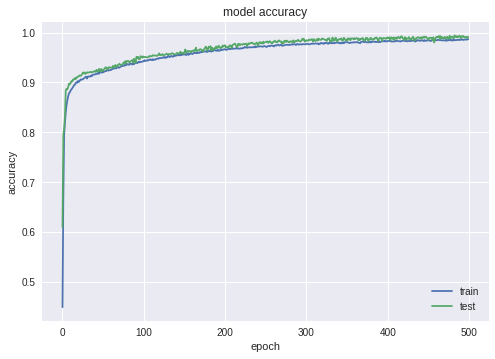

In [31]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

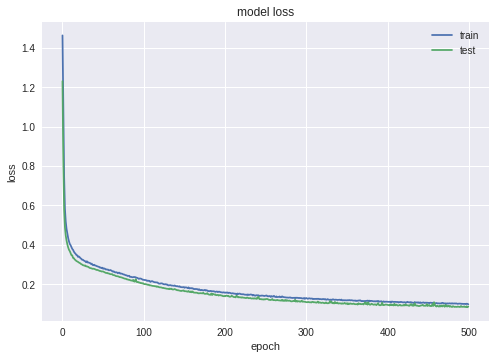

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
# Model evaluation with test data set 
# Prediction at test data set
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test,batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

4789/4789 [==============================] - 0s 24us/step
[0.09579739726941405, 0.9847567454836119]
Baseline Error: 1.52%


In [0]:
# Class prediction
test_class = model.predict_classes(X_test)

In [36]:
## Confusion matrix
print("Confussion matrix:\n%s" %
      metrics.confusion_matrix(Y_test, test_class))

Confussion matrix:
[[1078   21    3    0    0]
 [  15  852   12    0    0]
 [   0    0 1616    2    0]
 [   0    0   14  957    0]
 [   0    0    2    4  213]]


In [37]:
# Precission and accuracy:
print("Classification report:\n%s" %
      metrics.classification_report(Y_test, test_class))
print("Classification accuracy: %f" %
      metrics.accuracy_score(Y_test, test_class))

Classification report:
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1102
          1       0.98      0.97      0.97       879
          2       0.98      1.00      0.99      1618
          3       0.99      0.99      0.99       971
          4       1.00      0.97      0.99       219

avg / total       0.98      0.98      0.98      4789

Classification accuracy: 0.984757


###  Prediction at Grid Locations

In [0]:
# Create grid data frame with ten bands
X_grid = grid_point[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
# Create xy-coordinated data frame
xy_grid=grid_point[['ID','x', 'y']]

In [0]:
# Scale the grid set
X_grid = preprocessing.scale(X_grid)

In [0]:
# Prediction at grid locations
grid_class = pd.DataFrame(model.predict_classes(X_grid))

In [0]:
# Join xy-coordinates with predicted grid_class data frame
grid_class_xy = pd.concat([xy_grid, grid_class], axis=1, join_axes=[xy_grid.index])

In [0]:
# Rename predicted class column to Class_ID
grid_class_xy.columns.values[3] = 'Class_ID'

In [0]:
# Join  Landuse class 
grid_class_final=pd.merge(grid_class_xy, LU_ID, left_on='Class_ID', right_on='Class_ID', how='left')

In [0]:
## Write CSV files 
grid_class_final.to_csv('predcted_landuse_class.csv', index=False)

For mapping precticted landuse class, you need to install,  **geopandas**  in colab.  just run following conmands it will  in colab vertual env. 

In [0]:
!pip install geopandas

In [0]:
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Proj, transform

In [0]:
# Define geometry
geometry = [Point(xy) for xy in zip(grid_class_final.x, grid_class_final.y)]
# Define projection (UTM zone 17N)
crs = {'init': 'epsg:26917'}
## Create Geodata frame
gdf = gpd.GeoDataFrame(grid_class_final, crs=crs, geometry = geometry)

# Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")
# Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")

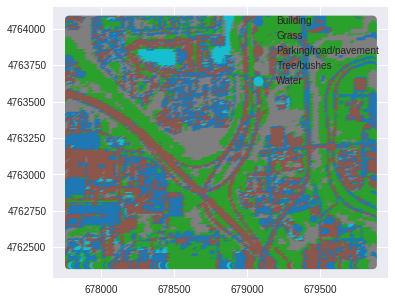

In [47]:
gdf.plot(column='Description',  legend=True,figsize=(6, 6))